In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [4]:
#storing the file path/ url path in a variable
df0 = pd.read_csv("C:\\Users\\vikas\\Desktop\\PGDS\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

### 01. Checking the data using .head(), .sample(n), .shape, features' dtypes using .info()

In [5]:
#read top 5 rows of the data
df0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#read last 5 rows of the data
df0.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
#checking shape & datatypes of the columns in data...
print(df0.shape)
print(' ')
print(df0.dtypes)

(1470, 35)
 
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWo

In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
#data shape
df0.shape
(1470, 35)

(1470, 35)

#####  no null data and there are 1470 rows and 35 columns

## 02. Checking for duplicate entries...

In [11]:
df0.duplicated().sum()

0

##### in our data there are no duplicate entries.

### 03. Checking for descriptive statistics..

In [12]:
df0.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### seems like every thing is good here

### 04. Checking for missing & null values...

In [13]:
#total missing values
df0.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Absolutely no null entry

In [14]:
# % of missing values
df0.isnull().sum()*100/df0.shape[0]

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

#### Data set has no missing value/null value

### 05. Checking entries with ZERO Value..

In [15]:
#counting total vaues of 0/zero entries in data...
df0[df0 ==0].count()

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked          197
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel            631
TotalWorkingYears            11
TrainingTimesLastYear        54
WorkLifeBalance               0
YearsAtC

### there are some zero entries in some of data we will handle it later

In [18]:
# count values in a column
df0['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### Attrition has only two type of data 'yes' and 'no'

In [19]:
df0['Attrition']=df0['Attrition'].factorize(['No','Yes'])[0]
df0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### encoded the attrition data in 0 and 1

In [20]:
df1=df0.copy()

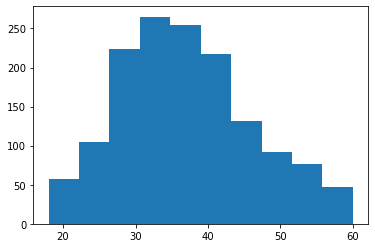

In [21]:
plt.hist(df1['Age'])
plt.show()

In [22]:
df1['Age'].value_counts(sort=True).head()

35    78
34    77
36    69
31    69
29    68
Name: Age, dtype: int64

In [23]:
df1['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [24]:
df1['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [25]:
df1=df1.drop(['StandardHours','EmployeeCount'],axis=1)
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


#### there is no need of these columns so droping it

In [26]:
df2=df1.copy()

### 06. Data Visualization...

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vikas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vikas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

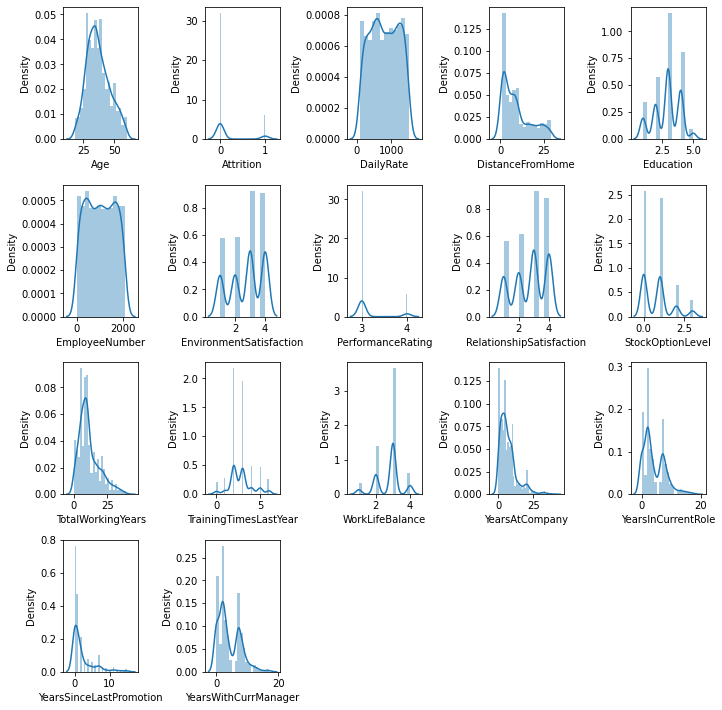

In [31]:
#distribution of numerical features.. 
plt.figure(figsize=(10,12))
plotnumber=1
for column in df2[['Age','Attrition','DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].columns:
    if plotnumber<=17:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.tight_layout()

#### there are different types of data in this data set and this is not giving any clear vision so we will look different visualization technique. 

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vikas\anaconda3\lib\si

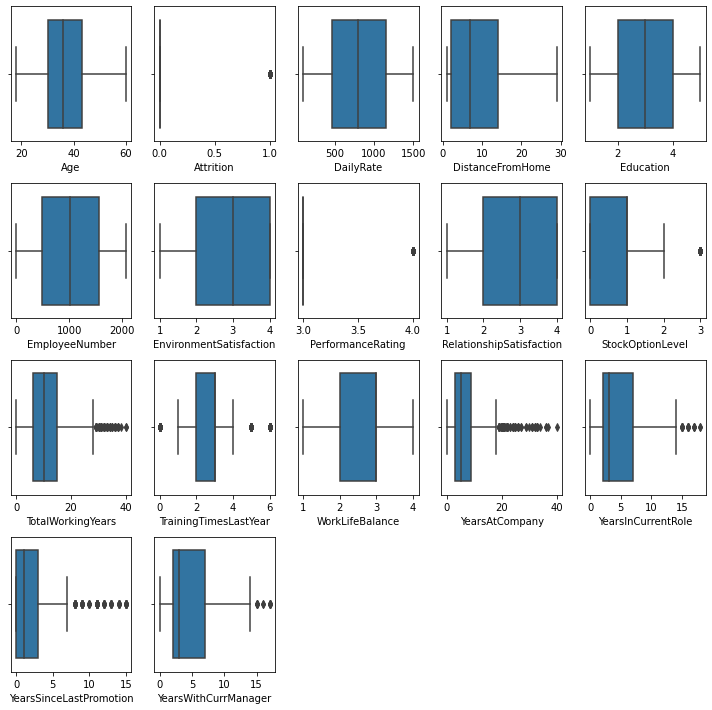

In [32]:
plt.figure(figsize=(10,12))
plotnumber=1
for column in df2[['Age','Attrition','DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].columns:
    if plotnumber<=17:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(df2[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.tight_layout()

#### there are some outliers in different column's data, we will remove it  

### 07. Checking outliers..

In [33]:
#1st quantile 
q1= df2.quantile(0.25)
#3rd quantile
q3=df2.quantile(0.75)
#IQR
iqr=q3-q1

In [34]:
totalworkingyears=(q3.TotalWorkingYears + (1.5*iqr.TotalWorkingYears))
print(totalworkingyears)   

index=np.where(df2['TotalWorkingYears']> totalworkingyears)
index

df2=df2.drop(df2.index[index])
print(df2.shape)

df2.reset_index()

28.5
(1407, 33)


,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,...,3,3,1,17,3,3,5,2,0,3
1403,1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,...,3,1,1,9,5,3,7,7,1,7
1404,1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,...,4,2,1,6,0,3,6,2,0,3
1405,1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,...,3,4,0,17,3,2,9,6,0,8


In [35]:
yearsatcompany=(q3.YearsAtCompany + (1.5*iqr.YearsAtCompany))
print(yearsatcompany)   

index=np.where(df2['YearsAtCompany']> yearsatcompany)
index

df2=df2.drop(df2.index[index])
print(df2.shape)

df2.reset_index()

18.0
(1330, 33)


,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,...,3,3,1,17,3,3,5,2,0,3
1326,1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,...,3,1,1,9,5,3,7,7,1,7
1327,1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,...,4,2,1,6,0,3,6,2,0,3
1328,1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,...,3,4,0,17,3,2,9,6,0,8


In [36]:
yearsincurrentrole=(q3.YearsInCurrentRole + (1.5*iqr.YearsInCurrentRole))
print(yearsincurrentrole)   

index=np.where(df2['YearsInCurrentRole']> yearsincurrentrole)
index

df2=df2.drop(df2.index[index])
print(df2.shape)

df2.reset_index()

14.5
(1325, 33)


,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,...,3,3,1,17,3,3,5,2,0,3
1321,1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,...,3,1,1,9,5,3,7,7,1,7
1322,1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,...,4,2,1,6,0,3,6,2,0,3
1323,1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,...,3,4,0,17,3,2,9,6,0,8


In [37]:
yearssincelastpromotion=(q3.YearsSinceLastPromotion + (1.5*iqr.YearsSinceLastPromotion))
print(yearssincelastpromotion)   

index=np.where(df2['YearsSinceLastPromotion']> yearssincelastpromotion)
index

df2=df2.drop(df2.index[index])
print(df2.shape)

df2.reset_index()

7.5
(1276, 33)


,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,...,3,3,1,17,3,3,5,2,0,3
1272,1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,...,3,1,1,9,5,3,7,7,1,7
1273,1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,...,4,2,1,6,0,3,6,2,0,3
1274,1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,...,3,4,0,17,3,2,9,6,0,8


In [38]:
yearsWithCurrManager=(q3.YearsWithCurrManager + (1.5*iqr.YearsWithCurrManager))
print(yearsWithCurrManager)   

index=np.where(df2['YearsWithCurrManager']> yearsWithCurrManager)
index

df2=df2.drop(df2.index[index])
print(df2.shape)

df2.reset_index()

14.5
(1273, 33)


,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,...,3,3,1,17,3,3,5,2,0,3
1269,1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,...,3,1,1,9,5,3,7,7,1,7
1270,1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,...,4,2,1,6,0,3,6,2,0,3
1271,1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,...,3,4,0,17,3,2,9,6,0,8


C:\Users\vikas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vikas\anaconda3\lib\si

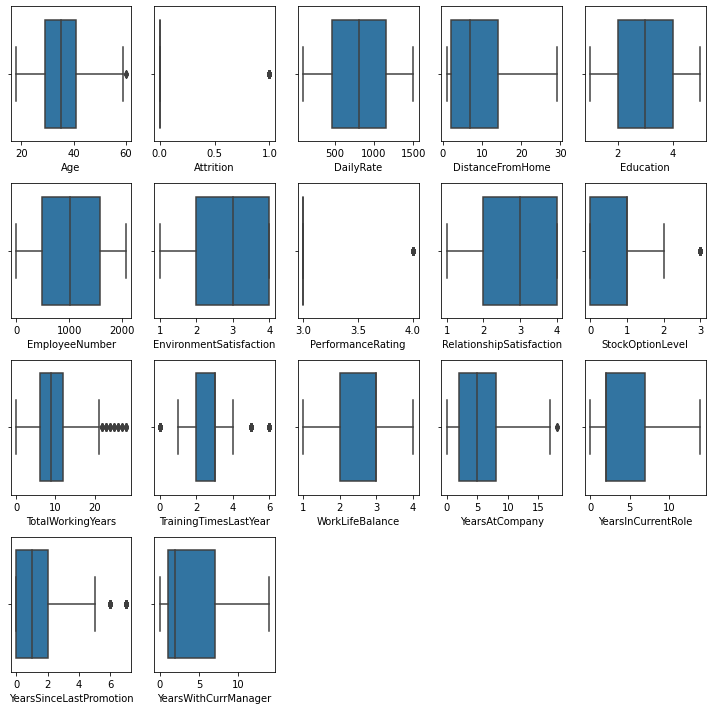

In [39]:
plt.figure(figsize=(10,12))
plotnumber=1
for column in df2[['Age','Attrition','DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].columns:
    if plotnumber<=17:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(df2[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.tight_layout()

#### it looks better now 

### 08. Checking Skewness..

In [40]:
df3=df2.copy()

In [41]:
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [42]:
df3.shape

(1273, 33)

In [43]:
df3.skew()

C:\Users\vikas\AppData\Local\Temp/ipykernel_9152/3045539152.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.skew()


Age                         0.518072
Attrition                   1.747363
DailyRate                  -0.025795
DistanceFromHome            0.955627
Education                  -0.283563
EmployeeNumber              0.006243
EnvironmentSatisfaction    -0.317637
HourlyRate                 -0.042724
JobInvolvement             -0.518001
JobLevel                    1.225803
JobSatisfaction            -0.329925
MonthlyIncome               1.768001
MonthlyRate                 0.028696
NumCompaniesWorked          1.020677
PercentSalaryHike           0.794952
PerformanceRating           1.936618
RelationshipSatisfaction   -0.289354
StockOptionLevel            0.951432
TotalWorkingYears           0.930003
TrainingTimesLastYear       0.577632
WorkLifeBalance            -0.547646
YearsAtCompany              0.753775
YearsInCurrentRole          0.827872
YearsSinceLastPromotion     1.637314
YearsWithCurrManager        0.788310
dtype: float64

C:\Users\vikas\AppData\Local\Temp/ipykernel_9152/3765777970.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.skew().drop(['Attrition']).plot(kind='bar', rot = 0, fontsize=8)


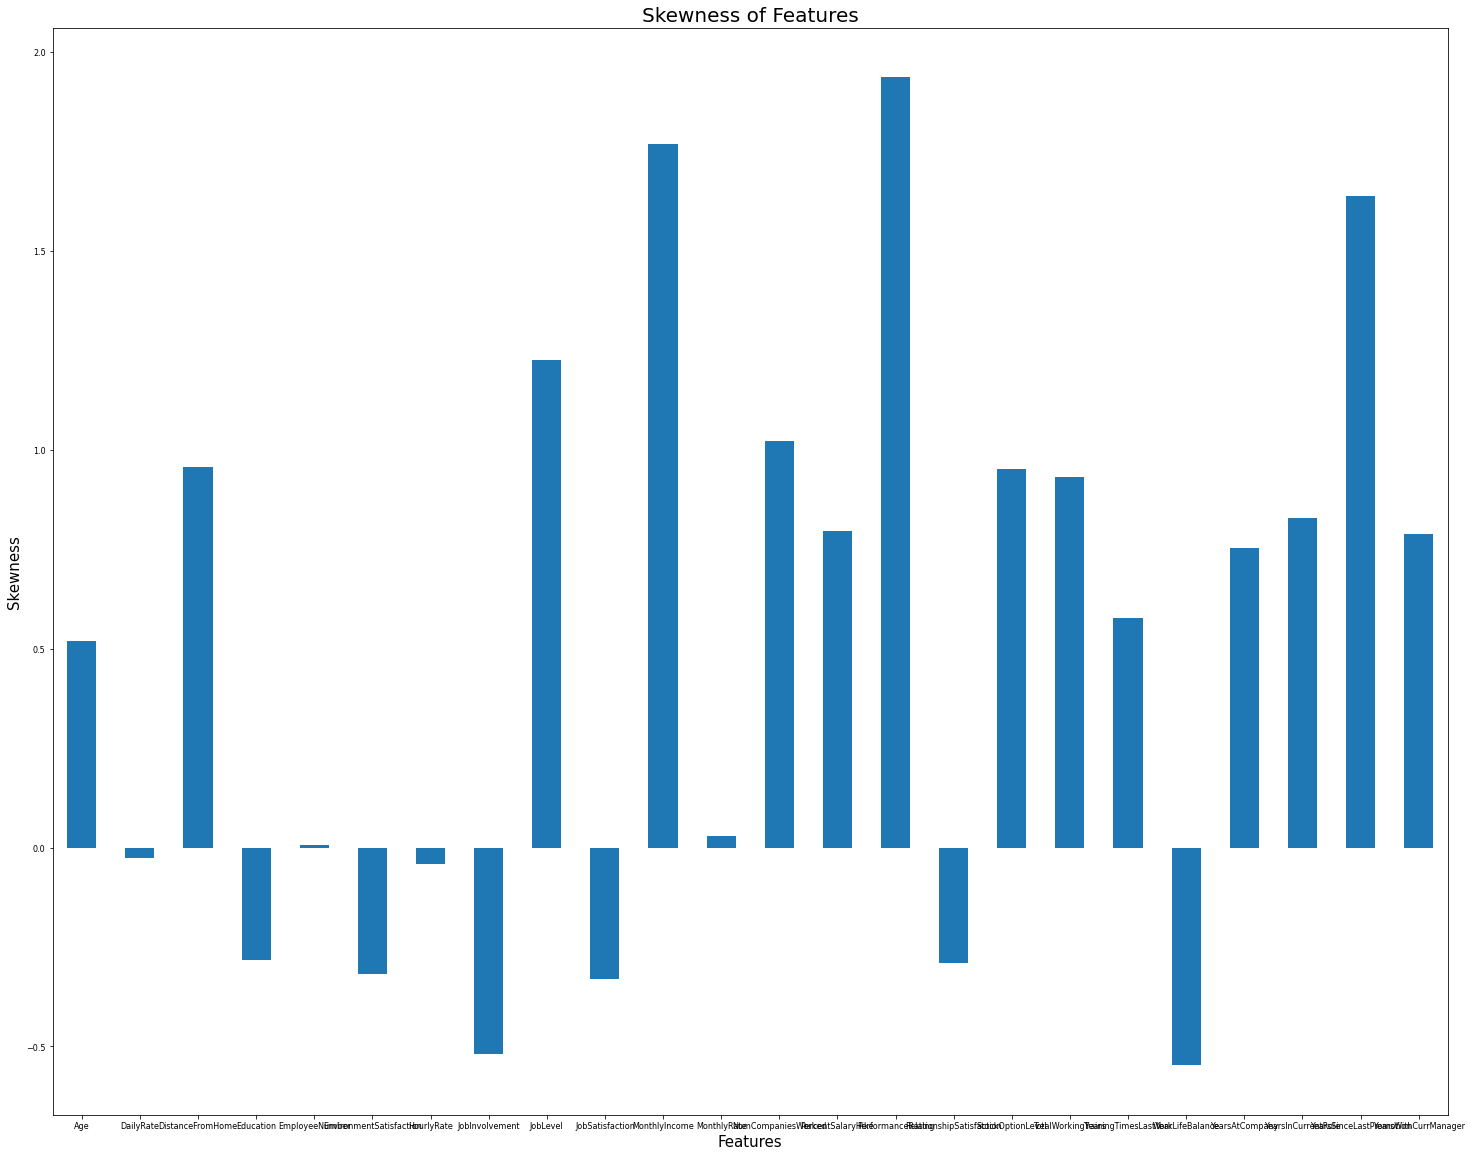

In [49]:
plt.figure(figsize=(25,20))
df3.skew().drop(['Attrition']).plot(kind='bar', rot = 0, fontsize=8)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('Skewness of Features', fontsize=20)
plt.show()

#### there is no such skewness in this data set

In [45]:
df4 = df3.copy()

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from scipy.stats import zscore, boxcox

import statsmodels.formula.api as smf

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV



from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import pickle

import warnings
warnings.filterwarnings('ignore')

In [58]:
df4['PerformanceRating']=np.log(df4['PerformanceRating'])

In [59]:
df4.skew()

Age                         0.518072
Attrition                   1.747363
DailyRate                  -0.025795
DistanceFromHome            0.955627
Education                  -0.283563
EmployeeNumber              0.006243
EnvironmentSatisfaction    -0.317637
HourlyRate                 -0.042724
JobInvolvement             -0.518001
JobLevel                    1.225803
JobSatisfaction            -0.329925
MonthlyIncome               1.768001
MonthlyRate                 0.028696
NumCompaniesWorked          1.020677
PercentSalaryHike           0.794952
PerformanceRating           1.936618
RelationshipSatisfaction   -0.289354
StockOptionLevel            0.951432
TotalWorkingYears           0.930003
TrainingTimesLastYear       0.577632
WorkLifeBalance            -0.547646
YearsAtCompany              0.753775
YearsInCurrentRole          0.827872
YearsSinceLastPromotion     1.637314
YearsWithCurrManager        0.788310
dtype: float64

### 09. Checking Correlation & Multicollinearity...¶

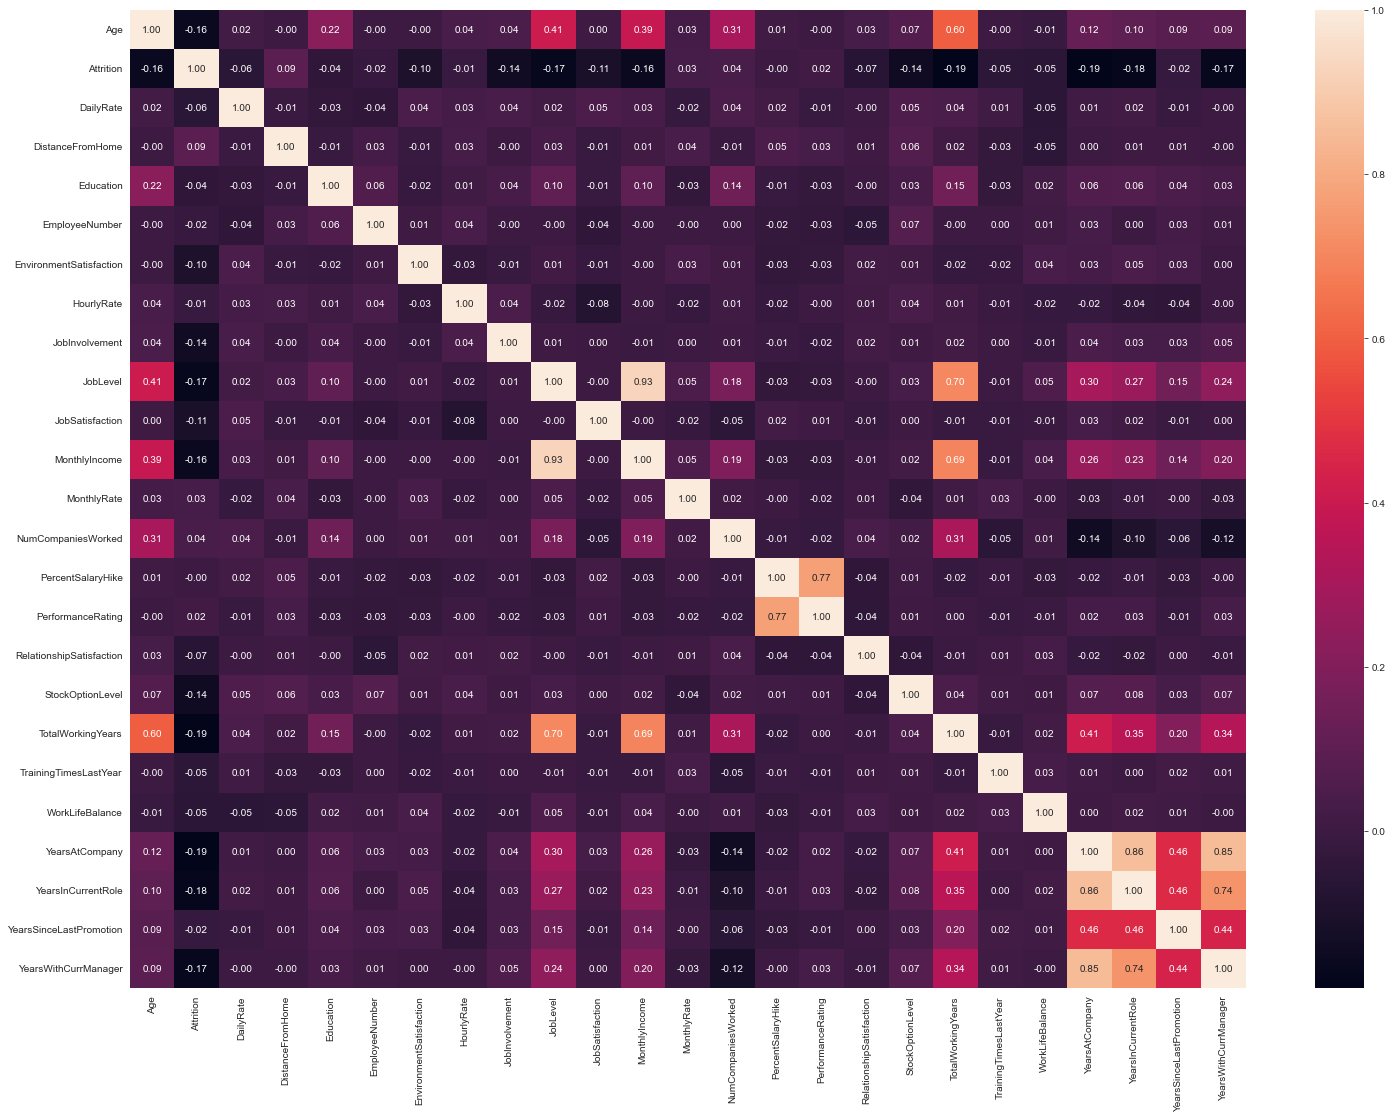

In [64]:
#Heatmap of numerical columns
plt.figure(figsize = (25,18))
sns.heatmap(df4.corr(),annot=True, fmt = ".2f")
plt.show()

<AxesSubplot:xlabel='YearsAtCompany'>

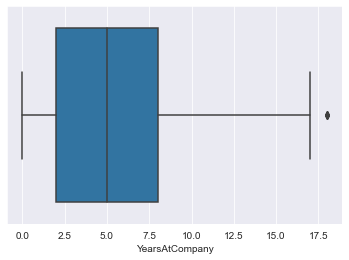

In [65]:
sns.boxplot(df4['YearsAtCompany'])

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

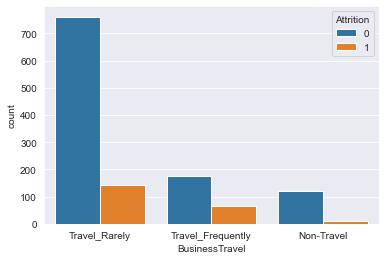

In [66]:
sns.countplot(x=df4['BusinessTravel'],hue='Attrition',data=df4)

(array([0, 1, 2]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Human Resources')])

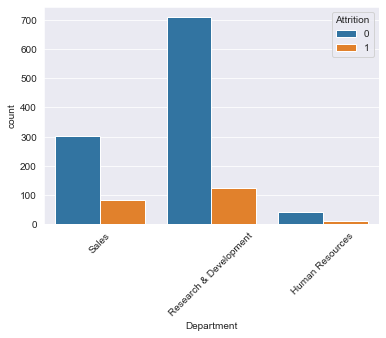

In [67]:
sns.countplot(x='Department',hue='Attrition',data=df4)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Gender', ylabel='count'>

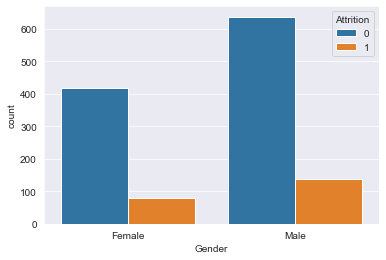

In [68]:
sns.countplot(x='Gender',hue="Attrition",data=df4)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Sales Representative'),
  Text(6, 0, 'Research Director'),
  Text(7, 0, 'Manager'),
  Text(8, 0, 'Human Resources')])

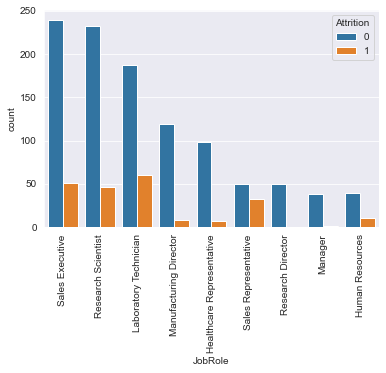

In [70]:
sns.countplot(x='JobRole',hue='Attrition',data=df4)
plt.xticks(rotation=90)

In [71]:
df5=df4.copy()

In [72]:
columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for x in columns:
    df5[x]=preprocessing.LabelEncoder().fit_transform(df5[x])
    
df5

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,0.381242,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,0.693147,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,0.381242,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,0.381242,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,0.381242,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,0.381242,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,0.381242,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,0.693147,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,0.381242,4,0,17,3,2,9,6,0,8


#### encoded the required categorical column with the help of label encoder

### 10. Preparing data for ML model

### differentiating the features and label

In [74]:
X=df5.drop('Attrition',axis=1)
X

y=df5['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1273, dtype: int64

In [75]:
#data scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [76]:
#Splitting data for train and Test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [77]:
#shape of the data
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1273, 32)
(954, 32)
(319, 32)


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [82]:
models=[]
models.append(('Logistic Regression',LogisticRegression(solver='liblinear',C=0.3,fit_intercept=True)))
models.append(('Random Forest Classifier',RandomForestClassifier()))
models.append(('Gradient Boosting Classifier',GradientBoostingClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(('AdaBoost Classifier',AdaBoostClassifier()))


n_folds=5
results=[]
labels=['Not Resigned','Resigned']


for name,model in models:
    K_fold=model_selection.KFold(n_splits=n_folds)
    print('Testing model',name)
    
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=K_fold,scoring='f1_weighted',verbose=0,n_jobs=-1)
    
    
     #fitting the model
    model.fit(X_train,y_train)
    #running predictions and accuracy calculation
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_score=accuracy_score(train_pred,y_train)
    test_score=accuracy_score(test_pred,y_test)
    
    #adding the results to the list 
    results.append(cv_results)
    message=f"Cross_validation mean:{cv_results.mean()},Training Accuracy:{train_score},Test Accuracy:{test_score}"
    print(message)
    print(classification_report(y_test,test_pred,target_names=labels))
    print(confusion_matrix(y_test,test_pred,labels=[0,1]))

Testing model Logistic Regression
Cross_validation mean:0.8335260610834077,Training Accuracy:0.870020964360587,Test Accuracy:0.8652037617554859
              precision    recall  f1-score   support

Not Resigned       0.89      0.95      0.92       264
    Resigned       0.66      0.45      0.54        55

    accuracy                           0.87       319
   macro avg       0.78      0.70      0.73       319
weighted avg       0.85      0.87      0.85       319

[[251  13]
 [ 30  25]]
Testing model Random Forest Classifier
Cross_validation mean:0.7951559199203501,Training Accuracy:1.0,Test Accuracy:0.8495297805642633
              precision    recall  f1-score   support

Not Resigned       0.86      0.98      0.92       264
    Resigned       0.71      0.22      0.33        55

    accuracy                           0.85       319
   macro avg       0.78      0.60      0.62       319
weighted avg       0.83      0.85      0.81       319

[[259   5]
 [ 43  12]]
Testing model Gradien

### Hyperparameter tuning using GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
model1=LogisticRegression(solver='liblinear')
param={'C':(0.2,0.3,0.35,0.45,0.55),'fit_intercept':('True','False')}
clf=GridSearchCV(model1,param)
clf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.2, 0.3, 0.35, 0.45, 0.55),
                         'fit_intercept': ('True', 'False')})

In [85]:
#find the best params
clf.best_params_

{'C': 0.3, 'fit_intercept': 'True'}

In [86]:
#print the best score
clf.best_score_

0.8522127307798291

In [87]:
grid_search=LogisticRegression(C= 0.3, penalty= 'l1', solver= 'liblinear')
grid_search.fit(X_train,y_train)

LogisticRegression(C=0.3, penalty='l1', solver='liblinear')

In [89]:
y_pred1=grid_search.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       264
           1       0.66      0.38      0.48        55

    accuracy                           0.86       319
   macro avg       0.77      0.67      0.70       319
weighted avg       0.84      0.86      0.84       319



### after hyperparameter tuning, this model's accuracy is increased positively 

### Model Saving

In [90]:
filename='HR_Analytics.pkl'
pickle.dump(model1,open(filename,'wb'))